# ANALIZA YOUTUBE KANALOV

Iz spletne strani <a href="https://socialblade.com/youtube/top/5000/mostsubscribed">podatki youtuberjev</a> sem pobrala podatke in jih zapisala v csv datoteko. POdatki so razvrščeni padajoče po številu vpisanihv kanal. Z analizo bom skušala ugotoviti povezavo med število vpisanih ter številom objav, torej ali so kanali z več objavami tudi višje na lestvici. Kateri kanali so najbolj gledani, ali imajo slednji tudi več vpisanih. Kakšne kategrije se pojavljajo in katere so najpogostejše. 

## Uvoz podatkov in osnovni pregled

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

Oglejmo si tabelo z vsemi podatki (razvrščena po številu vpisanih). Iz te lahko takoj dobimo nekaj zanimivih ugotovitev in povezav.

In [8]:
podatki = pd.read_csv('podatki.csv', index_col='mesto')
pd.options.display.max_rows = 20
podatki

,ocena,ime,kategorija,objave,vpisani,ogledi
mesto,,,,,,
1,A++,T-Series,music,14322,125.00,96177195880
2,A,PewDiePie,games,4072,102.00,24562405073
4,A++,Cocomelon - Nursery Rhymes,education,495,70.70,48846632332
8,A,5-Minute Crafts,howto,4091,63.60,16967087622
9,A++,SET India,entertainment,35278,63.40,46794371073
...,...,...,...,...,...,...
4996,B+,DC,entertainment,3049,2.51,1143056518
4997,A-,T-FUN,howto,626,2.53,620643742
4998,A-,Funk Explode,music,266,2.51,618774174


In [24]:
podatki[podatki.vpisani > 50.00].ime.count()

7

Le 7 kanalov ima več kot 50M vpisanih, oglejmo si še kako se spreminja število vpisanih. Iz spodnjega grafa je razvidno, da število na začetku zelo hitro pada potem pa se le manjo spreminja, ko pridemo nekje pod 10 M vpisanih.

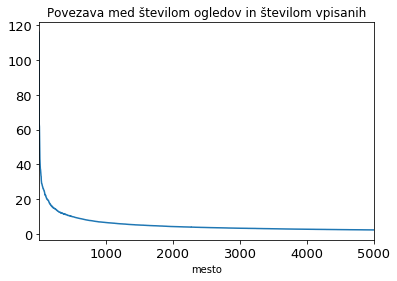

In [195]:
plt = podatki['vpisani'].plot(title=' Število vpisanih', fontsize=13)

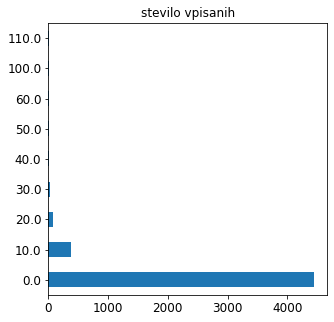

In [194]:
#zaokrozimo na 10 miljonov in preštejemo kanale v vsakem razdelku
podatki['zaokrozeni_vpisani'] = 10 * (podatki.vpisani // 10)
podatki['zaokrozeni_vpisani'].value_counts().plot(kind = 'barh', figsize=(5, 5), title='stevilo vpisanih', fontsize = '12')

Opazimo, da je število kanalov z več kot 10 M ogledi, majhno, zato je zgorni graf tako hitro pada. To je tudi potrdilo zgornjo ugotovitev, vidimo namreč, da več kot 4500 kanalov ima manj kot 10 M vpisanih.

## Razpored po ocenah

In [19]:
podatki.sort_values(['ogledi', 'ocena'], ascending=[False, True])

,ocena,ime,kategorija,objave,vpisani,ogledi
mesto,,,,,,
1,A++,T-Series,music,13927,116.00,87011278231
9,A++,SET India,entertainment,33302,58.40,42305090305
4,A++,Cocomelon - Nursery Rhymes,education,469,63.80,42092956470
11,A+,WWE,sports,44227,50.20,36777154026
23,A++,Zee TV,entertainment,80479,36.90,34354338112
...,...,...,...,...,...,...
4527,A-,NextFlix,NaN,6,2.52,38879
4319,C+,Gjigandet e Vegjel,NaN,6,2.61,27582
3161,C,Тех.Обзор,people,12,3.23,27498


In [54]:
ocene = podatki.groupby('ocena')
ocene.size()

ocena
A       695
A+       32
A++       8
A-     1434
B       895
B+     1606
B-      125
C         5
C+       39
C-        1
D         2
D-       98
dtype: int64

Želimo izvedetei s kakšno oceno so večinoma ocenjeni kanali, ker je ocen veliko jih zberemo v štiri kategorije A, B, C, D.

In [13]:
ocena_A = podatki[(podatki.ocena == 'A')| (podatki.ocena == 'A+') | (podatki.ocena == 'A++') | (podatki.ocena == 'A-')]
ocena_B = podatki[(podatki.ocena == 'B')| (podatki.ocena == 'B+') | (podatki.ocena == 'B-')]
ocena_C = podatki[(podatki.ocena == 'C')| (podatki.ocena == 'C+') | (podatki.ocena == 'C-')]
ocena_D = podatki[(podatki.ocena == 'D')| (podatki.ocena == 'D-')]

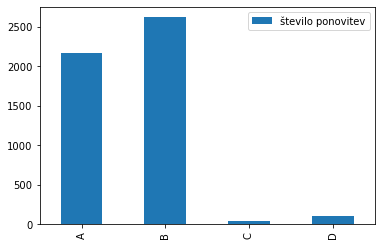

In [201]:
a = ocena_A.ime.count()
b = ocena_B.ime.count()
c = ocena_C.ime.count()
d = ocena_D.ime.count()

pogrupirana_ocena = {'A' : a,'B' : b,'C':c,'D':d }
graf = pd.DataFrame.from_dict(pogrupirana_ocena, 'index')
graf.columns = ['število ocenjenih']
graf.plot(kind = 'bar')


Tako lahko hitro opazimo, da je največ ocenjih z B takoj za tem pa z oceno A, kar je nekako pričakovan, da so kanali z največ vpisanimi tudi najbolj priljubljeni oz. dobro ocenjeni.

In [81]:
ocena_A[(podatki.vpisani > 50.00) &
        (podatki.ogledi > 10000000000)]

C:\Users\tanja\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,ocena,ime,kategorija,objave,vpisani,ogledi
mesto,,,,,,
1,A++,T-Series,music,13927,116.0,87011278231
2,A,PewDiePie,entertainment,3991,102.0,23798731725
4,A++,Cocomelon - Nursery Rhymes,education,469,63.8,42092956470
8,A,5-Minute Crafts,howto,3748,61.7,16163442260
9,A++,SET India,entertainment,33302,58.4,42305090305
10,A+,Canal KondZilla,music,1213,52.9,26950843861
11,A+,WWE,sports,44227,50.2,36777154026


In [94]:
ocena_D

,ocena,ime,kategorija,objave,vpisani,ogledi
mesto,,,,,,
112,D-,The Late Late Show with James Cord…,entertainment,3663,20.80,6427238448
170,D-,Amit Bhadana,entertainment,64,17.00,1268368226
218,D,Michael Jackson,music,1,15.10,262345
387,D-,Blossom,howto,271,11.40,3007736253
410,D-,HiMan,people,143,11.10,783665179
...,...,...,...,...,...,...
4471,D-,Vasya - Nursery Rhymes &amp; Kids Songs,NaN,58,2.54,421706131
4630,D-,Chance and Anthony,NaN,5,2.48,9941215
4674,D-,Tatiana,music,497,2.47,1116564802


Iz prve tabele opazimo, da so med prvimi desetimi vsi ocenjeni z A. Iz druge tabele, pa lahko razberemo, da na prvih sto mestih ni noben kanal ocenjen z najslabšo oceno D. To še dodatno potrjuje, da so tisti kanali z več vpisanimi tudi bolje ocenjeni.


## Povezava med objavami ter kategorijami

Želimo ugotovit ali je število objav povezano s številom vpisanih, ter s čim je povezano število objav.
Najprej poglejmo koliko je najpogosteje število objav, za boljšo preglednost pogledamo le do 15 000 objav. Opazimo da večina kanalov ima manj kot 1000 objav.

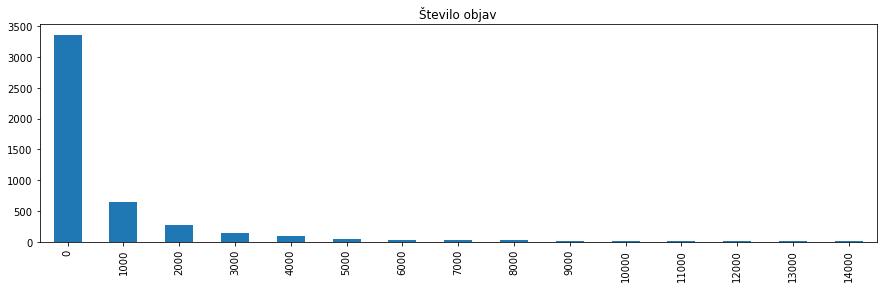

In [10]:
# pogrupiramo število objav na 1000
podatki['zaokrozene_objave'] = 1000 * (podatki.objave // 1000)
odstranimo_najvecje = podatki[podatki.objave < 15000]
odstranimo_najvecje['zaokrozene_objave'].value_counts().sort_index(ascending=True).plot(kind = 'bar', figsize=(15, 4), title='Število objav')


In [11]:
aktivni_youtuberji = podatki[podatki.objave > 100000]
aktivni_youtuberji

,ocena,ime,kategorija,objave,vpisani,ogledi,zaokrozene_objave
mesto,,,,,,,
91,A+,ABS-CBN Entertainment,entertainment,137889,24.50,32844926984,137000
104,A,TEDx Talks,nonprofit,148664,22.80,4106522687,148000
162,A,ABP NEWS,news,137255,18.30,4564342641,137000
201,A,IndiaTV,entertainment,150210,16.20,5712180543,150000
328,A,IGN,games,136038,12.80,9921822723,136000
...,...,...,...,...,...,...,...
3498,A-,News7 Tamil,news,124440,3.20,1213254854,124000
3751,A,SBS Drama,entertainment,339896,3.10,2966001111,339000
4168,B+,VideoYoum7 | قناة اليوم �&hellip;,entertainment,107675,2.83,1188221850,107000


V zgornji razpredelnici so prikazani tisti kanalo ki imajo nadpovprečno število objav. Presentljivo je dejstvo, da ima najbolj aktiven kanal več kot 130 000 objav, kar je 130-krat več kot povprečen kanal. Opazimo tudi, da mesta, ki jih dosegajo kanali z več objavami niso ravno visoka. Iz tega sklepamo, da večje število objav ne zagotovi tudi več vpisanih.

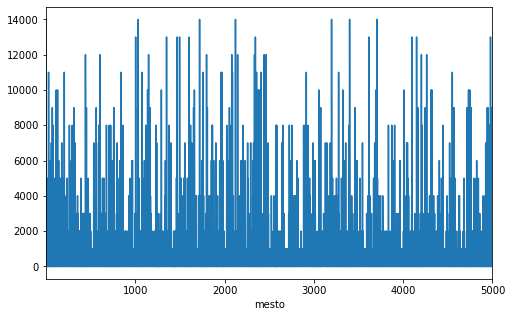

In [35]:
odstranimo_najvecje = podatki[podatki.objave < 15000]
odstranimo_najvecje['zaokrozene_objave'].plot( figsize=(8, 5))

Ni očitne povezave med število objav ter mestom na lestvici.

Če pogledamo kakšna je poevzava med aktivnejšimi kanali ter kategorijami, opazimo, da so to večinoma kanali z novicami. Če premislimo je razlog očiten, saj novice objavljajo vsak dan, povprečen kanal pa nekje enkrat na teden. Tako lahko sklepamo, da je število objav tesneje povezano s kategorijo, kot pa s številom vpisanih (posledično mestom na lestvici).

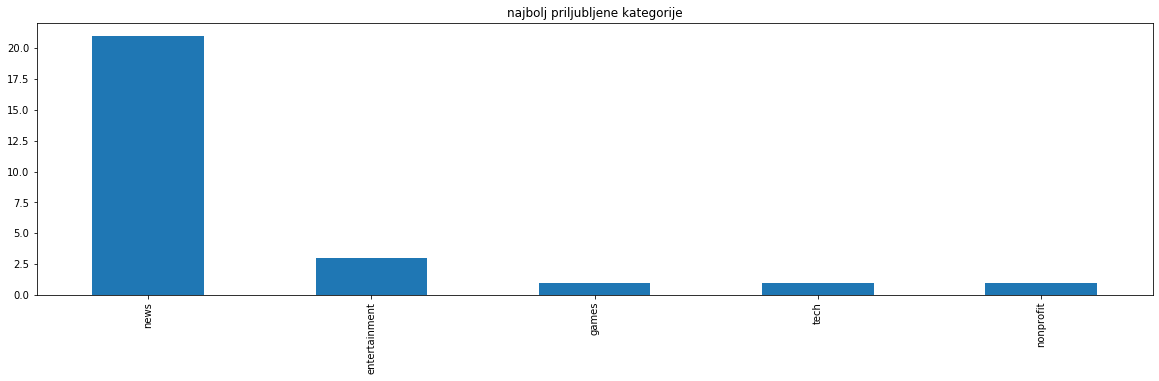

In [150]:
aktivni_youtuberji['kategorija'].value_counts().head(20).plot(kind = 'bar', figsize=(20, 5), title='najbolj priljubljene kategorije')

Zanimiv je tudi podatek o tem, katere kategorije so najbolj pogoste. Največkrat se pojavi *entertainment*, najverjetneje so tu vsi kanali, ki jih težko razporedimo v neko specifično kategorijo, zato je teh največ.

In [80]:
najpogostejše_kategorije = podatki.groupby('kategorija')
najpogostejše_kategorije.size().to_frame('pojavitev')

,pojavitev
kategorija,
animals,14
autos,27
comedy,332
education,198
entertainment,1340
film,242
games,515
howto,260
music,887


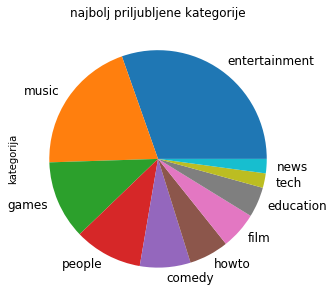

In [79]:
podatki['kategorija'].value_counts().head(10).plot(kind = 'pie',  figsize=(5, 5), title='najbolj pogoste kategorije', fontsize = '12')

Če pogledamo samo tiste kanale z največ vpisanimih se prav tako največkrat pojavita katrgoriji *music* in *entertainment*.

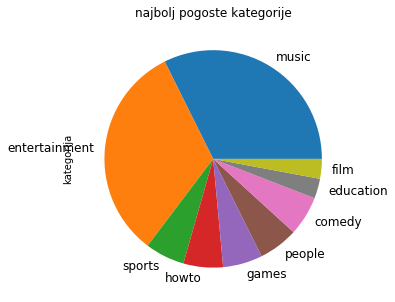

In [225]:
prvi = podatki[podatki.vpisani > 30.00]
prvi['kategorija'].value_counts().head(10).plot(kind = 'pie',  figsize=(5, 5), title='najbolj priljubljene kategorije', fontsize = '12')

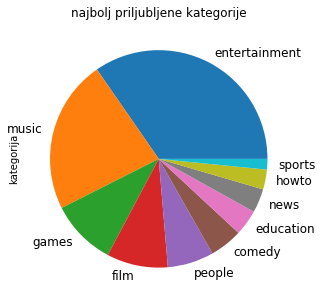

In [14]:
ocena_A['kategorija'].value_counts().head(10).plot(kind = 'pie',  figsize=(5, 5), title='najbolj priljubljene kategorije', fontsize = '12')

## Odvisnost od števila ogledov

Preverimo še ali je res večje število ogledov povezano z večjim številom vpisanimih. Razvrstimo seznam po številu ogledov in opazimo takoj, da ima kanal na prvem mestu tudi največ ogledov. Preverimo ali je to le naključje.

In [25]:
podatki[podatki.ogledi > 10000000000 ].ime.count() 

91

In [17]:
podatki['ogledi'].max()

96177195880

In [16]:
urejeni_po_ogledih = podatki.sort_values(by = 'ogledi', ascending = False)
urejeni_po_ogledih[['ime', 'ogledi']].head(20)

,ime,ogledi
mesto,,
1,T-Series,96177195880
4,Cocomelon - Nursery Rhymes,48846632332
9,SET India,46794371073
11,WWE,38793825406
22,Zee TV,38446611326
94,Ryan's World,35675915985
205,netd müzik,33423244671
91,ABS-CBN Entertainment,32844926984
36,Movieclips,31130504675


Iz razpredelnice opazmimo tudi, da ima kanal z največ vpisanimi enkrat večjo gledanost kot drugi na seznamu najbolj ogledanih kanalov. Zaradi te velike razlike ga bomo pri risanju grafa izpustili, tako bo rezultat bol pregleden.

Text(0, 0.5, 'število ogledov')

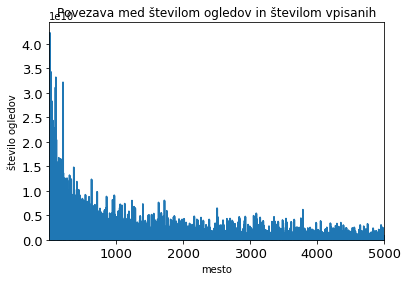

In [226]:
odstranimo_ekstreme = podatki[(podatki.ogledi < 96177195880)]
plt = odstranimo_ekstreme['ogledi'].plot(kind = 'area', title='Povezava med številom ogledov in številom vpisanih', fontsize=13)
plt.set_xlabel("mesto")
plt.set_ylabel("število ogledov")

Iz grafa opazimo, da imajo kanali višje na lestvici tudi več vpisanih, seveda pa so tudi izjeme.

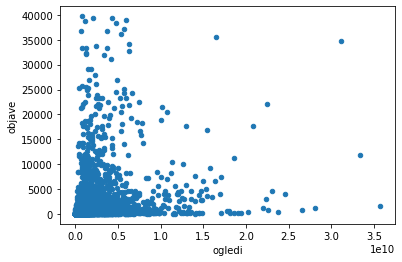

In [25]:
odstranimo_ekstreme2 = podatki[(podatki.objave < 40000) & (podatki.ogledi < 38793825406)]
odstranimo_ekstreme2[['ogledi', 'objave']].plot.scatter('ogledi', 'objave')

Iz grafa ni očitne povezave med število objav in številom ogledov. Ker je kar nekaj pikic na levem robu, sklepamo, da več bjav ne doprinese nujno večje gledanosti. Opazimo tudi, da večina kanalov ima manj kot 10 000 objav ter manj kot 5M oglrdov, saj so tam pike najbolj gosto razporejen. Oglejmo si podrobneje še to 'zgoščeno območje'.  večina pik je ba spodnjem trikotniku pod diagonalo.

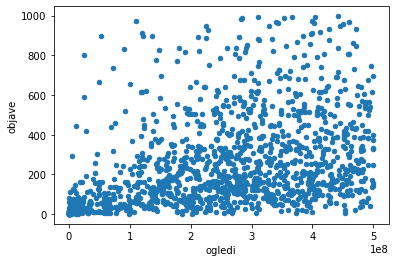

In [33]:
odstranimo_ekstreme2 = podatki[(podatki.objave < 1000) & (podatki.ogledi < 500000000)]
odstranimo_ekstreme2[['ogledi', 'objave']].plot.scatter('ogledi', 'objave')

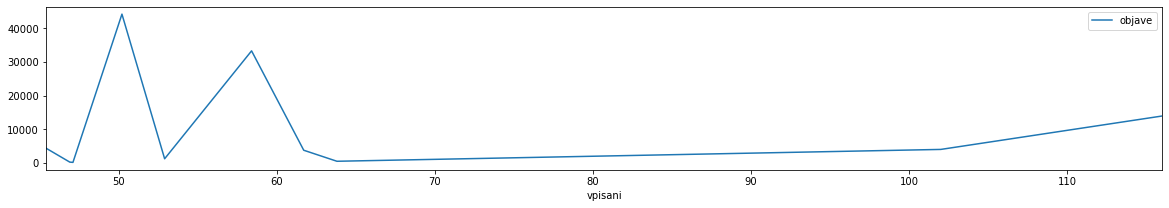

In [180]:
prvih_10 = podatki.head(10)
podatki_vpisani = prvih_1000.groupby('vpisani')
podatki_vpisani[['objave']].mean().plot(figsize=(20, 3))

## Zaključek

Iz analize sem izvedela nekaj zanimivih podatkov. Nekatere moje hipteze so se potrdile. Kanali višje na lestvici imajo v splošnem višjo oceno ter večje število vpisanih. Presenetil me je podatek s številom objav, saj najaktivejši kanali ne spadajo med prvimi sto na lestvici. Število objav sem nato povezala z vrsto kanala oziroma njegovo kategorijo, kar je pojasnilo zakaj ne spadajo med prvo stoterico, saj so najaktivnejši večinoma novice medtem, ko so bolj priljubljene katogerije glsba in zabava.